# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Data Preprocessing 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

# Reading Data(Image)

In [2]:
path_folder = "C:/Users/Jay Ajmera/Desktop/Nasheee/hach_summit/train"
class_name = os.listdir(path_folder)
class_name.sort()
class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
Loading Folder -- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot  The Count of Classes ==>  0
Loading Folder -- Corn_(maize)___Common_rust_  The Count of Classes ==>  1
Loading Folder -- Corn_(maize)___Northern_Leaf_Blight  The Count of Classes ==>  2
Loading Folder -- Corn_(maize)___healthy  The Count of Classes ==>  3
---- Done ----------- 


# Preprocessing Data & Visualization

In [3]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [4]:
print(data.shape)

(7316, 100, 100, 3)


## Transform Label To One Hot Encoder

In [5]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0., 0., 0.], dtype=float32)

# Shuffle Data

In [6]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5852, 100, 100, 3), (5852, 4), (1464, 100, 100, 3), (1464, 4))

# Visualization Some Data

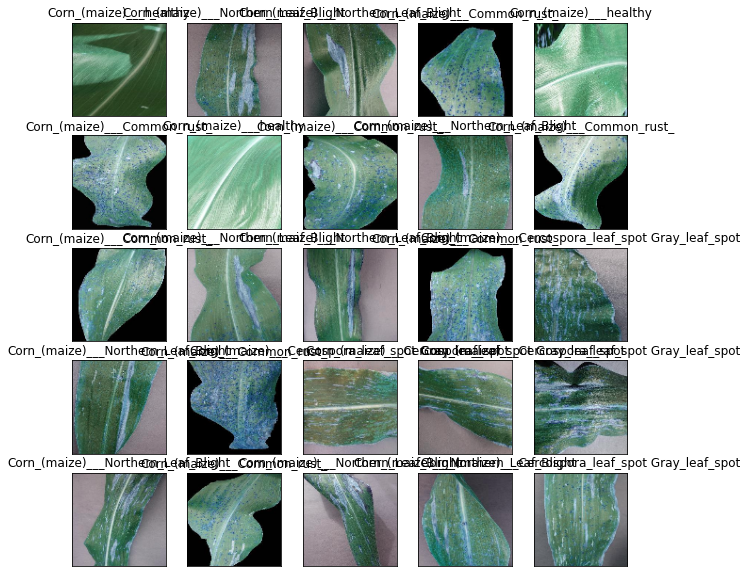

In [8]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

# Building CNN Model

In [9]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 50, 50, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 64)        0

In [10]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/50
183/183 [==============================] - 43s 227ms/step - loss: 0.6064 - accuracy: 0.7276 - val_loss: 0.3017 - val_accuracy: 0.8852
Epoch 2/50
183/183 [==============================] - 43s 234ms/step - loss: 0.2857 - accuracy: 0.8836 - val_loss: 0.1790 - val_accuracy: 0.9337
Epoch 3/50
183/183 [==============================] - 47s 258ms/step - loss: 0.1802 - accuracy: 0.9287 - val_loss: 0.1801 - val_accuracy: 0.9378
Epoch 4/50
183/183 [==============================] - 43s 237ms/step - loss: 0.1767 - accuracy: 0.9385 - val_loss: 0.1504 - val_accuracy: 0.9378
Epoch 5/50
183/183 [==============================] - 39s 216ms/step - loss: 0.1312 - accuracy: 0.9508 - val_loss: 0.1234 - val_accuracy: 0.9611
Epoch 6/50
183/183 [==============================] - 39s 211ms/step - loss: 0.1264 - accuracy: 0.9581 - val_loss: 0.1262 - val_accuracy: 0.9549
Epoch 7/50
183/183 [==============================] - 40s 217ms/step - loss: 0.1330 - accuracy: 0.9518 - val_loss: 0.1114 - val_ac

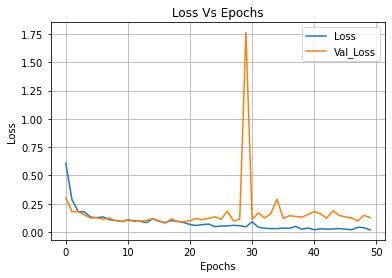

In [11]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

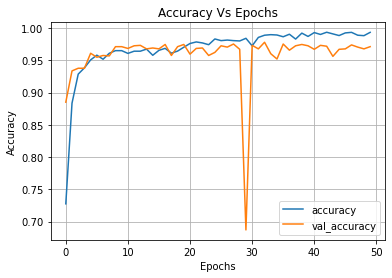

In [12]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

46/46 [==============================] - 2s 40ms/step - loss: 0.1267 - accuracy: 0.9713
The Accuracy Testing Data is ==> 0.9713114500045776 %
The loss Testing Data is ==> 0.12670552730560303


# System Prediction

1/1 [==============================] - 0s 34ms/step
The Prediction is ==>  [0. 0. 1. 0.]
Type Of Planet ==> Corn_(maize)
Type Disease Of Planet ==> Northern_Leaf_Blight


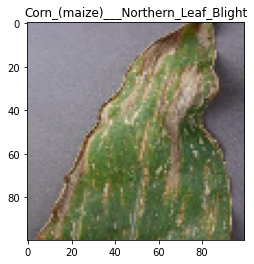

In [29]:
path_img1 = input()
image = cv2.imread(path_img1)
image = cv2.resize(image, (100, 100))
# image = image/255.0
# print(image1.shape)
new_image = np.reshape(image, [1, 100, 100, 3])

# ================== Show Prediction =================================

prediction = model.predict(new_image)[0]
# print(prediction1)

new_prediction = class_name[np.argmax(prediction)]
print("The Prediction is ==> ",prediction)

print("Type Of Planet ==>", new_prediction[:new_prediction.index("__")])
print("Type Disease Of Planet ==>", new_prediction[new_prediction.index("__")+3:])

# ================== Show image And Label Prediction =================================

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()

# Show Prediction

In [2]:
path_test = r"D:\Prototype-Green-Hackathon\testing"
image_testing = []
label_testing = []
for img in os.listdir(path_test):
    image = path_test + "\\" + img
    image = cv2.imread(image)
    new_image = cv2.resize(image, (224, 224))
    image_testing.append(new_image)
    label_testing.append(img[:-5])

image_testing = np.array(image_testing)
label_testing = np.array(label_testing)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(6, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    new_image = np.resize(image_testing[i], [1, 224, 224, 3])
    prediction = model.predict(new_image)
    prediction = prediction[0]
    print(prediction)
    plt.imshow(image_testing[i])
    plt.title(f"The Real Prediction is {label_testing[i]} \n The model Prediction is {class_name[np.argmax(prediction)]}")

NameError: name 'os' is not defined

# Download CNN Model

In [15]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [17]:
model.save('pickle Hackathon_model.hin')

INFO:tensorflow:Assets written to: pickle Hackathon_model.hin\assets


INFO:tensorflow:Assets written to: pickle Hackathon_model.hin\assets
